In [1]:
import sympy as sp
import numpy as np

In [2]:
x, y, z, w = sp.symbols('x, y, z, w') #[x,y] and [z,w] are elements in \mathbb{R}^2
u11, u12, u21, u22 = sp.symbols('u11, u12, u21, u22') # entries of an arbitrary unitary matrix 
T = sp.symbols('T', real=True) # trace of the arbitrary 2x2 unitary matrix. Always real if the matrix is 2x2.

In [3]:
n = 4 # Index for the degree of the irreducible representation of SU(2). n can be any positive integer.

## If n is small, do the calculation:
if n<5:
    
    a = sp.IndexedBase('a')
    monomials = [x**(n-i)*y**i for i in range(n+1)]

    fn = sum([a[i]*monomials[i] for i in range(n+1)]) # Homogenous polynomial in x and y of degree n.
    print 'fn =\n\t\t'
    sp.pprint(fn)

fn =
		
 4         3           2  2           3         4     
x ⋅a[0] + x ⋅y⋅a[1] + x ⋅y ⋅a[2] + x⋅y ⋅a[3] + y ⋅a[4]


# Action of $U$ on $f_n$:
$$x\longmapsto u_{22}x-u_{12}y\quad\text{and}\quad y\longmapsto -u_{21}x+u_{11}y$$

In [4]:
    Ufn = fn.subs([(x, u22*z-u12*w),(y, -u21*z+u11*w)]).expand() # z,w are temporary variables.
    Ufn = Ufn.subs([(z,x),(w,y)])
    print 'Ufn =\n'
    sp.pprint(Ufn)
    Ufn = sp.Poly(Ufn,x,y) # Ufn is now a polynomial of x and y. a[0:n+1] and u_{ij} get treated as constants.

Ufn =

   4  4           3      4             3        3           3        3        
u₁₁ ⋅y ⋅a[4] - u₁₁ ⋅u₁₂⋅y ⋅a[3] - 4⋅u₁₁ ⋅u₂₁⋅x⋅y ⋅a[4] + u₁₁ ⋅u₂₂⋅x⋅y ⋅a[3] + 

   2    2  4             2            3             2            3            
u₁₁ ⋅u₁₂ ⋅y ⋅a[2] + 3⋅u₁₁ ⋅u₁₂⋅u₂₁⋅x⋅y ⋅a[3] - 2⋅u₁₁ ⋅u₁₂⋅u₂₂⋅x⋅y ⋅a[2] + 6⋅u₁

 2    2  2  2             2          2  2           2    2  2  2              
₁ ⋅u₂₁ ⋅x ⋅y ⋅a[4] - 3⋅u₁₁ ⋅u₂₁⋅u₂₂⋅x ⋅y ⋅a[3] + u₁₁ ⋅u₂₂ ⋅x ⋅y ⋅a[2] - u₁₁⋅u₁

 3  4                 2        3                 2        3                   
₂ ⋅y ⋅a[1] - 2⋅u₁₁⋅u₁₂ ⋅u₂₁⋅x⋅y ⋅a[2] + 3⋅u₁₁⋅u₁₂ ⋅u₂₂⋅x⋅y ⋅a[1] - 3⋅u₁₁⋅u₁₂⋅u

  2  2  2                           2  2                     2  2  2          
₂₁ ⋅x ⋅y ⋅a[3] + 4⋅u₁₁⋅u₁₂⋅u₂₁⋅u₂₂⋅x ⋅y ⋅a[2] - 3⋅u₁₁⋅u₁₂⋅u₂₂ ⋅x ⋅y ⋅a[1] - 4⋅

       3  3                   2      3                       2  3             
u₁₁⋅u₂₁ ⋅x ⋅y⋅a[4] + 3⋅u₁₁⋅u₂₁ ⋅u₂₂⋅x ⋅y⋅a[3] - 2⋅u₁₁⋅u₂₁⋅u₂₂ ⋅x ⋅y⋅a[2] + u₁₁

    3  3             4  4           3  

# Trace Calculation
**Trace of $Uf_n$ is given as the sum of the coefficients of the monimials $x^{n-i}y^{i}a_i,\;\forall i\in\{0,\ldots,n\}$.**

We write the trace of $Uf_n$ in terms of the trace of $U$ (denoted by the letter $T$). Hence, set $T=u_{11}+u_{22}$.

In [5]:
coeff = [Ufn.coeff_monomial(x**(n-i)*y**i) for i in range(0,n+1)]
coeff = [sp.Poly(coeff[i], a[i]).coeff_monomial(a[i]) for i in range(0,n+1)]
Trace = sum(coeff).simplify()
print 'Trace =\n'
sp.pprint(Trace)

# Use the fact that det(U) = 1.
Trace = Trace.subs(u12*u21, u11*u22-1).simplify()
print '\n\nTrace =\n'
sp.pprint(Trace)

Trace = Trace.subs(u22, T-u11).simplify()
print '\n\nTrace =\n'
sp.pprint(Trace)

Trace =

   4      3            2              2    2                              3   
u₁₁  + u₁₁ ⋅u₂₂ + 3⋅u₁₁ ⋅u₁₂⋅u₂₁ + u₁₁ ⋅u₂₂  + 4⋅u₁₁⋅u₁₂⋅u₂₁⋅u₂₂ + u₁₁⋅u₂₂  + 

   2    2                2      4
u₁₂ ⋅u₂₁  + 3⋅u₁₂⋅u₂₁⋅u₂₂  + u₂₂ 


Trace =

   4        3            2    2        2            3                  4      
u₁₁  + 4⋅u₁₁ ⋅u₂₂ + 6⋅u₁₁ ⋅u₂₂  - 3⋅u₁₁  + 4⋅u₁₁⋅u₂₂  - 6⋅u₁₁⋅u₂₂ + u₂₂  - 3⋅u

  2    
₂₂  + 1


Trace =

 4      2    
T  - 3⋅T  + 1


# General formula for Trace:

$$Trace = \sum_{k=0}^{[n/2]}(-1)^kT^{n-2k}\binom{n-k}{k}$$

where $[\cdot]$ denotes the Greatest Integer Function.

In [6]:
def Trace_Generalised(n):
    k = sp.symbols('k', integer = True, nonnegative = True)
    Trace_n = sp.Sum((-1)**k*T**(n-2*k)*sp.binomial(n-k,k), (k,0,sp.floor(n/2))).doit()
    return Trace_n
Trace_Generalised(10)

T**10 - 9*T**8 + 28*T**6 - 35*T**4 + 15*T**2 - 1

# Dirac delta
$$\delta(g) = \sum_{n=0}^{\infty}d_nTr(\rho_n(g))$$

We have, $d_n=n$ for each irreducible unitary representation $\rho_n$.

Therefore, 

$$\delta(g) = \sum_{n=0}^{\infty}d_nTr(\rho_n(g)) = \sum_{n=0}^{\infty}\sum_{k=0}^{[n/2]}(-1)^kn\cdot T^{n-2k}\binom{n-k}{k}$$

This double sum can be reindexed to get:
$$\delta(g) = \sum_{n=0}^{\infty}\sum_{m=0}^{\infty}(-1)^m(n+2m)T^{n}\binom{n+m}{m}$$

I believe this is convergent (by the ratio test) when $|T|<1$.

<IPython.core.display.Javascript object>


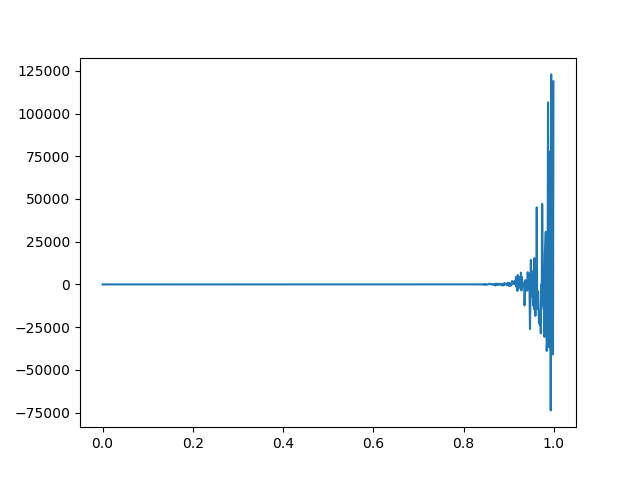

In [7]:
from matplotlib.pyplot import *
import numpy as np
%matplotlib notebook

a = np.arange(0, 1, 0.001)

plot(a, sp.lambdify(T, sum([Trace_Generalised(i) for i in range(1,100)]), 'numpy')(a))
show()

In [ ]:
a = sp.IndexedBase('a')